# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

In [2]:
# Step 1 - importar pandas para manipular planilhas

import pandas as pd

# Step 2 - importa a base de dados

dataset = pd.read_csv('clientes.csv')

# Score_credito
# Good - Bom
# Poor - Ruim
# Standard - aceitavel

In [3]:
dataset = pd.read_csv('clientes.csv')

display(dataset)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


,id_cliente,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,25982.666640,4.500000,33.316340,50505.123449,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,...,1426.220376,32.285173,221.220460,55.101315,392.697586,0.305600,0.511760,0.311040,0.31728,0.31040
std,14340.543051,2.291299,10.764812,38299.422093,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,...,1155.129026,5.116875,99.680716,39.006932,201.652719,0.460663,0.499864,0.462921,0.46542,0.46266
min,1006.000000,1.000000,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,...,0.230000,20.000000,1.000000,0.000000,0.007760,0.000000,0.000000,0.000000,0.00000,0.00000
25%,13664.500000,2.750000,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,...,566.072500,28.052567,144.000000,27.959111,267.615983,0.000000,0.000000,0.000000,0.00000,0.00000
50%,25777.000000,4.500000,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,...,1166.155000,32.305784,219.000000,45.156550,333.865366,0.000000,1.000000,0.000000,0.00000,0.00000
75%,38385.000000,6.250000,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,...,1945.962500,36.496663,302.000000,71.295797,463.215683,1.000000,1.000000,1.000000,1.00000,1.00000
max,50999.000000,8.000000,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,...,4998.070000,50.000000,404.000000,434.191089,1183.930696,1.000000,1.000000,1.000000,1.00000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

array([[<Axes: title={'center': 'id_cliente'}>,
        <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'salario_anual'}>,
        <Axes: title={'center': 'num_contas'}>],
       [<Axes: title={'center': 'num_cartoes'}>,
        <Axes: title={'center': 'juros_emprestimo'}>,
        <Axes: title={'center': 'num_emprestimos'}>,
        <Axes: title={'center': 'dias_atraso'}>,
        <Axes: title={'center': 'num_pagamentos_atrasados'}>],
       [<Axes: title={'center': 'num_verificacoes_credito'}>,
        <Axes: title={'center': 'divida_total'}>,
        <Axes: title={'center': 'taxa_uso_credito'}>,
        <Axes: title={'center': 'idade_historico_credito'}>,
        <Axes: title={'center': 'investimento_mensal'}>],
       [<Axes: title={'center': 'saldo_final_mes'}>,
        <Axes: title={'center': 'emprestimo_carro'}>,
        <Axes: title={'center': 'emprestimo_casa'}>,
        <Axes: title={'center': 'emprestimo_pessoal'}>,

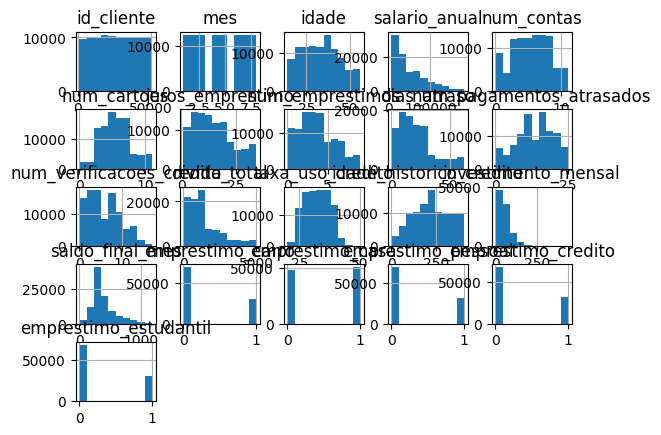

In [7]:
from numpy import dsplit
# Step 3 - Ver mais sobre o dataset
display(dataset.describe())

display(dataset.info())


array([[<Axes: title={'center': 'id_cliente'}>,
        <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'salario_anual'}>,
        <Axes: title={'center': 'num_contas'}>],
       [<Axes: title={'center': 'num_cartoes'}>,
        <Axes: title={'center': 'juros_emprestimo'}>,
        <Axes: title={'center': 'num_emprestimos'}>,
        <Axes: title={'center': 'dias_atraso'}>,
        <Axes: title={'center': 'num_pagamentos_atrasados'}>],
       [<Axes: title={'center': 'num_verificacoes_credito'}>,
        <Axes: title={'center': 'divida_total'}>,
        <Axes: title={'center': 'taxa_uso_credito'}>,
        <Axes: title={'center': 'idade_historico_credito'}>,
        <Axes: title={'center': 'investimento_mensal'}>],
       [<Axes: title={'center': 'saldo_final_mes'}>,
        <Axes: title={'center': 'emprestimo_carro'}>,
        <Axes: title={'center': 'emprestimo_casa'}>,
        <Axes: title={'center': 'emprestimo_pessoal'}>,

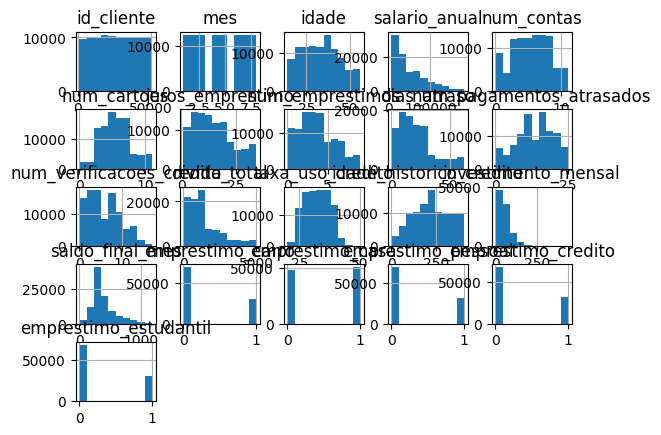

In [8]:
display(dataset.hist())

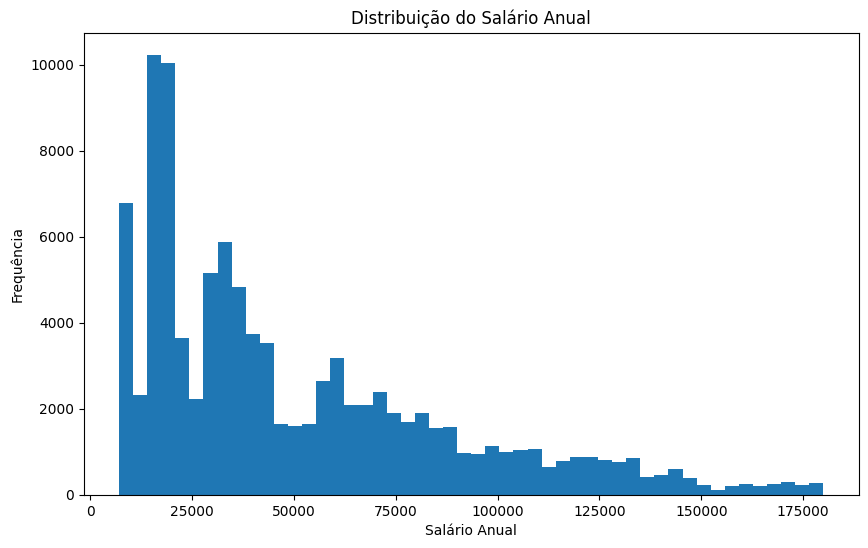

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset['salario_anual'].hist(bins=50)
plt.title('Distribuição do Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

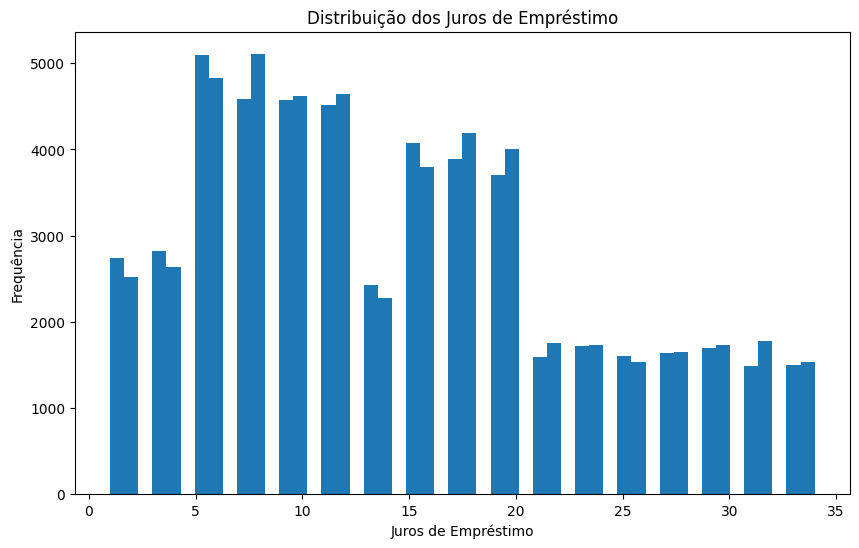

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset['juros_emprestimo'].hist(bins=50)
plt.title('Distribuição dos Juros de Empréstimo')
plt.xlabel('Juros de Empréstimo')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

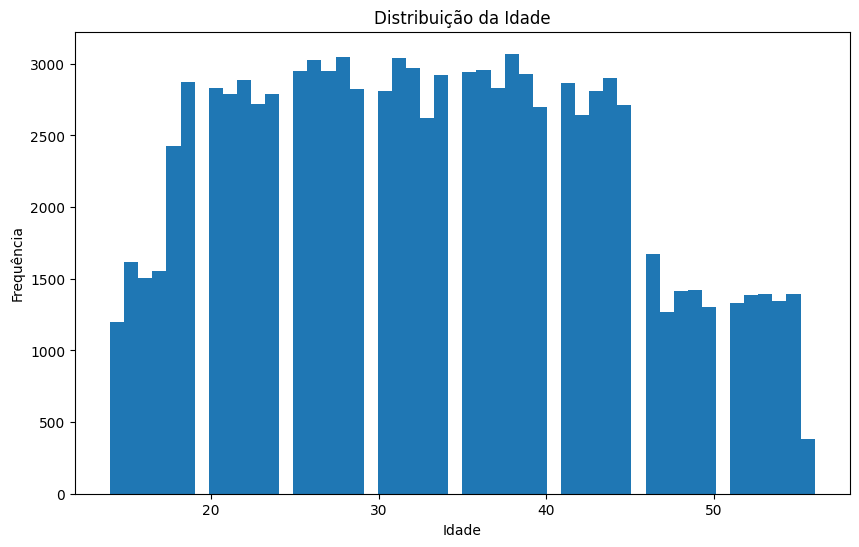

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset['idade'].hist(bins=50)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

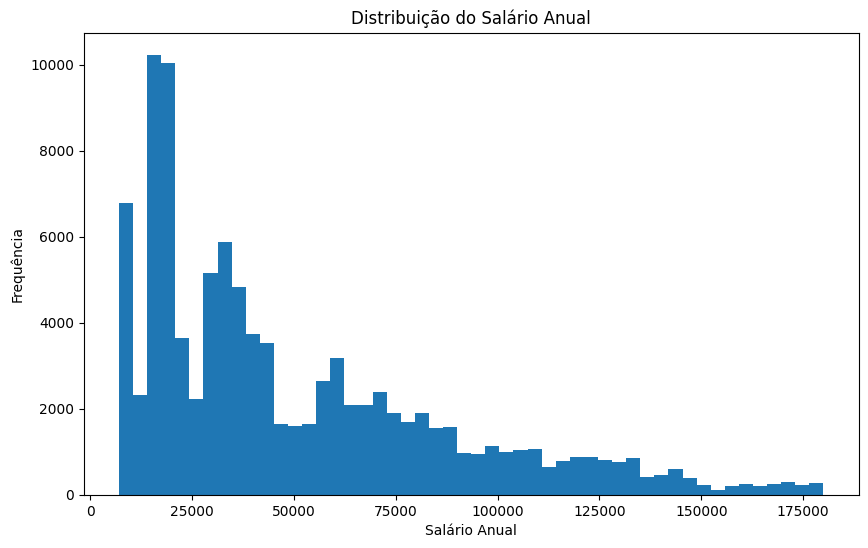

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset['salario_anual'].hist(bins=50)
plt.title('Distribuição do Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

In [19]:
# Step 4 - padronizar as colunas com Label enconder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


dataset['profissao'] = le.fit_transform(dataset['profissao'])

dataset['profissao'].unique()

display(dataset['profissao'])
# coluna profissao
# cientista - 1
# mecanico - 2

,profissao
0,2
1,2
2,2
3,2
4,2
...,...
99995,11
99996,11
99997,11
99998,11


In [20]:
dataset['comportamento_pagamento'] = le.fit_transform(dataset['comportamento_pagamento'])

dataset['comportamento_pagamento'].unique()

display(dataset['comportamento_pagamento'])



,comportamento_pagamento
0,1
1,3
2,5
3,4
4,2
...,...
99995,0
99996,2
99997,0
99998,3


In [22]:
dataset['mix_credito'] = le.fit_transform(dataset['mix_credito'])

dataset['mix_credito'].unique()

display(dataset['mix_credito'])

,mix_credito
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [23]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

None

In [24]:
# Step 5 -  Separar colunas de teste e treino
# coluna que queremos prever
y = dataset['score_credito']

# colunas da base de dados que eu vou usar pra fazer a previsão
x = dataset.drop(['score_credito', 'id_cliente'], axis=1)

display(x)
display(y)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,26.822620,265.0,21.465380,1,312.494089,1,1,1,1,0
1,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,...,31.944960,266.0,21.465380,3,284.629162,1,1,1,1,0
2,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,...,28.609352,267.0,21.465380,5,331.209863,1,1,1,1,0
3,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,...,31.377862,268.0,21.465380,4,223.451310,1,1,1,1,0
4,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,...,24.797347,269.0,21.465380,2,341.489231,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,...,34.663572,378.0,24.028477,0,479.866228,1,0,0,0,1
99996,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,...,40.565631,379.0,24.028477,2,496.651610,1,0,0,0,1
99997,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,...,41.255522,380.0,24.028477,0,516.809083,1,0,0,0,1
99998,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,...,33.638208,381.0,24.028477,3,319.164979,1,0,0,0,1


,score_credito
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
99995,Poor
99996,Poor
99997,Poor
99998,Standard


In [25]:
# separar em dados de treino e dados de teste
from sklearn.model_selection import train_test_split

# 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)


In [26]:
# Criar o modelo: Nota de crédito: Boa, Ok, Ruim

# Arvore de Decisão -> RandomForest
# Nearest Neighbors -> KNN -> Vizinhos Próximos

# importar a IA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# cria IA
modelo_arvoredecisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

# treinar IA
modelo_arvoredecisao.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)



KNeighborsClassifier()

In [28]:
# Escoher qual melhor modelo
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# acuracia
from sklearn.metrics import accuracy_score
display(abs(accuracy_score(y_teste, previsao_arvoredecisao)))
display(abs(accuracy_score(y_teste, previsao_knn)))


print(f" Arvore de Decisão: {accuracy_score(y_teste, previsao_arvoredecisao)}")
print(f" KNN: {accuracy_score(y_teste, previsao_knn)}")

0.8264333333333334

0.7324

 Arvore de Decisão: 0.8264333333333334
 KNN: 0.7324


In [33]:
# Usar o melhor modelo para fazer previsão de novos clientes

dataset_novos_clientes = pd.read_csv('novos_clientes.csv')
# Dataset raw
display(dataset_novos_clientes)

dataset_novos_clientes['profissao'] = le.fit_transform(dataset_novos_clientes['profissao'])

dataset_novos_clientes['comportamento_pagamento'] = le.fit_transform(dataset_novos_clientes['comportamento_pagamento'])

dataset_novos_clientes['mix_credito'] = le.fit_transform(dataset_novos_clientes['mix_credito'])

display(dataset_novos_clientes)

nova_previsao = modelo_arvoredecisao.predict(dataset_novos_clientes)

print(nova_previsao)


,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,1,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,1,312.487689,1,1,0,0,0
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,2,300.994163,0,0,0,0,1
2,2,48.0,1,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,0,345.081577,0,1,0,1,0


['Poor' 'Good' 'Standard']
